<a href="https://colab.research.google.com/github/erjavaid/Covid-19-Impact-Analysis-Dashboard/blob/main/Chronic_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
df=pd.read_csv('kidney_disease.csv')

In [7]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
df.drop('id',axis=1,inplace=True)

KeyError: "['id'] not found in axis"

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [12]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix,accuracy_score


In [16]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

rbc has [nan 'normal' 'abnormal'] values 


pc has ['normal' 'abnormal' nan] values 


pcc has ['notpresent' 'present' nan] values 


ba has ['notpresent' 'present' nan] values 


pcv has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values 


wc has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '

In [18]:
df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [19]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

rbc has [nan 'normal' 'abnormal'] values  


pc has ['normal' 'abnormal' nan] values  


pcc has ['notpresent' 'present' nan] values  


ba has ['notpresent' 'present' nan] values  


pcv has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values  


wc has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '264

In [20]:
data=df.copy()

In [21]:
data[cat_col].isnull().sum()

,0
rbc,152
pc,65
pcc,4
ba,4
pcv,70
wc,105
rc,130
htn,2
dm,2
cad,2


In [22]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

Random_value_imputation('pc')
Random_value_imputation('rbc')
data[cat_col].isnull().sum()

,0
rbc,0
pc,0
pcc,4
ba,4
pcv,70
wc,105
rc,130
htn,2
dm,2
cad,2


In [23]:
def mode_imputation(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

for col in cat_col:
    mode_imputation(col)

data[cat_col].isnull().sum()

,0
rbc,0
pc,0
pcc,0
ba,0
pcv,0
wc,0
rc,0
htn,0
dm,0
cad,0


In [24]:
num_col=[col for col in df.columns if df[col].dtype!='object']
data[num_col].isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
bgr,44
bu,19
sc,17
sod,87
pot,88


In [25]:
for col in num_col:
    Random_value_imputation(col)

data[num_col].isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0
pot,0


Text(0.5, 1.0, 'target Class')

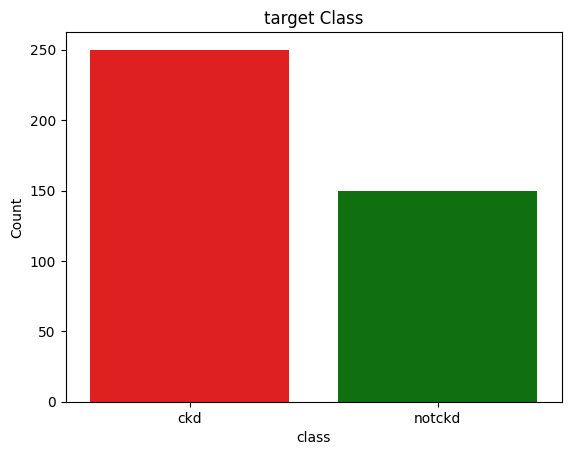

In [31]:
c=['red','green']
sns.countplot(x='classification',data=data, palette=c)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

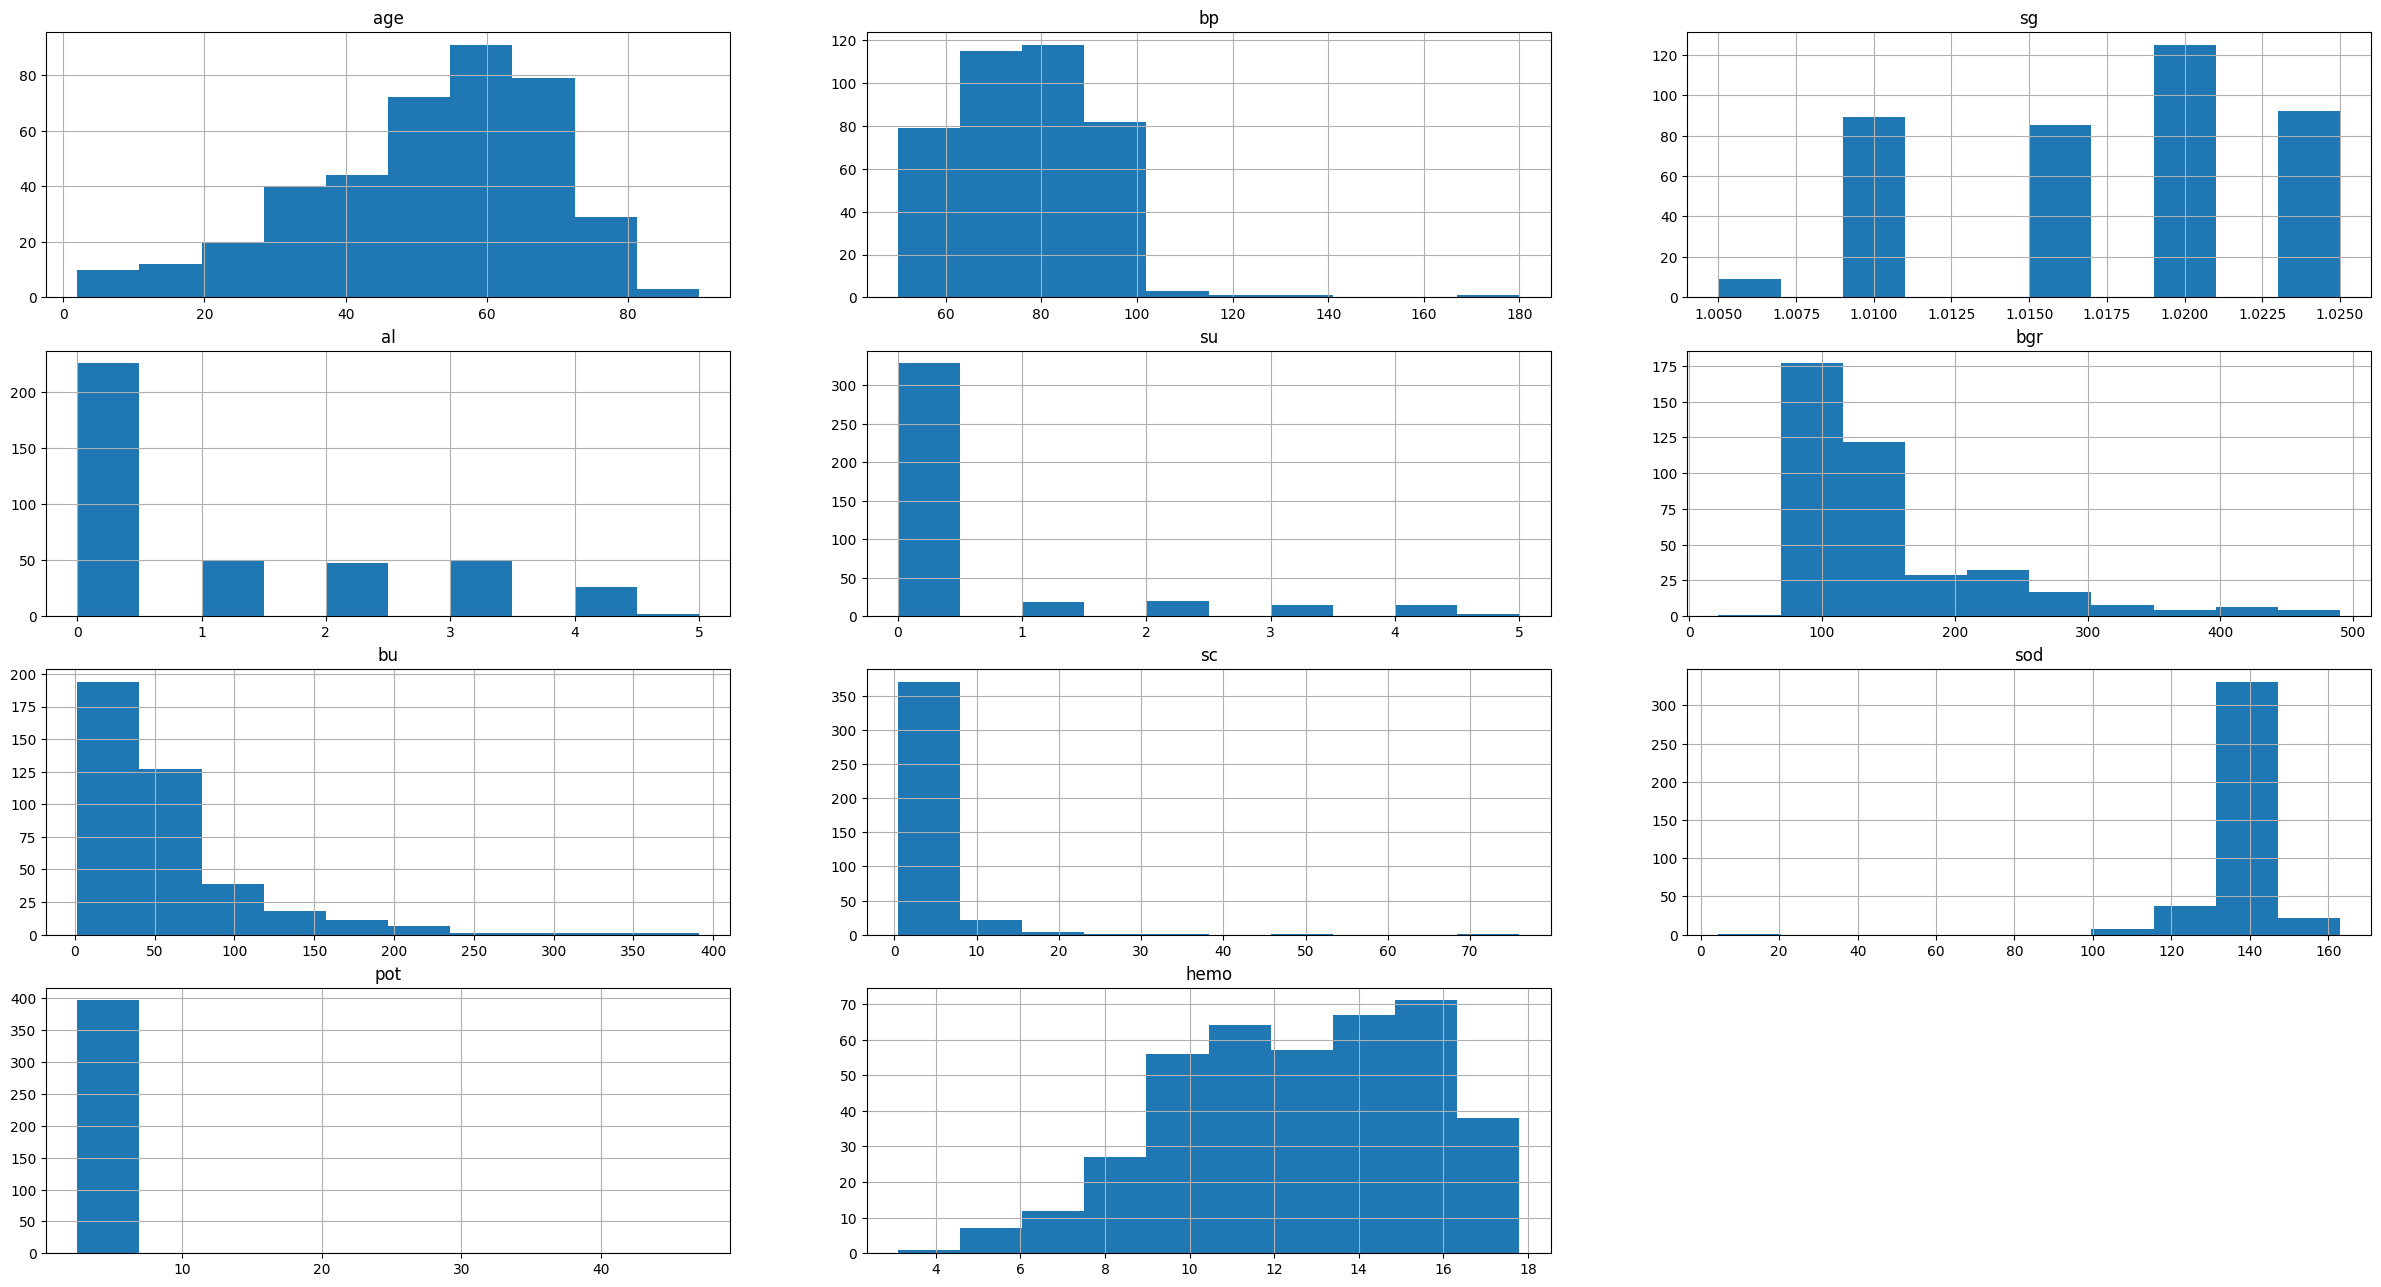

In [32]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)

ValueError: num must be an integer with 1 <= num <= 12, not 13

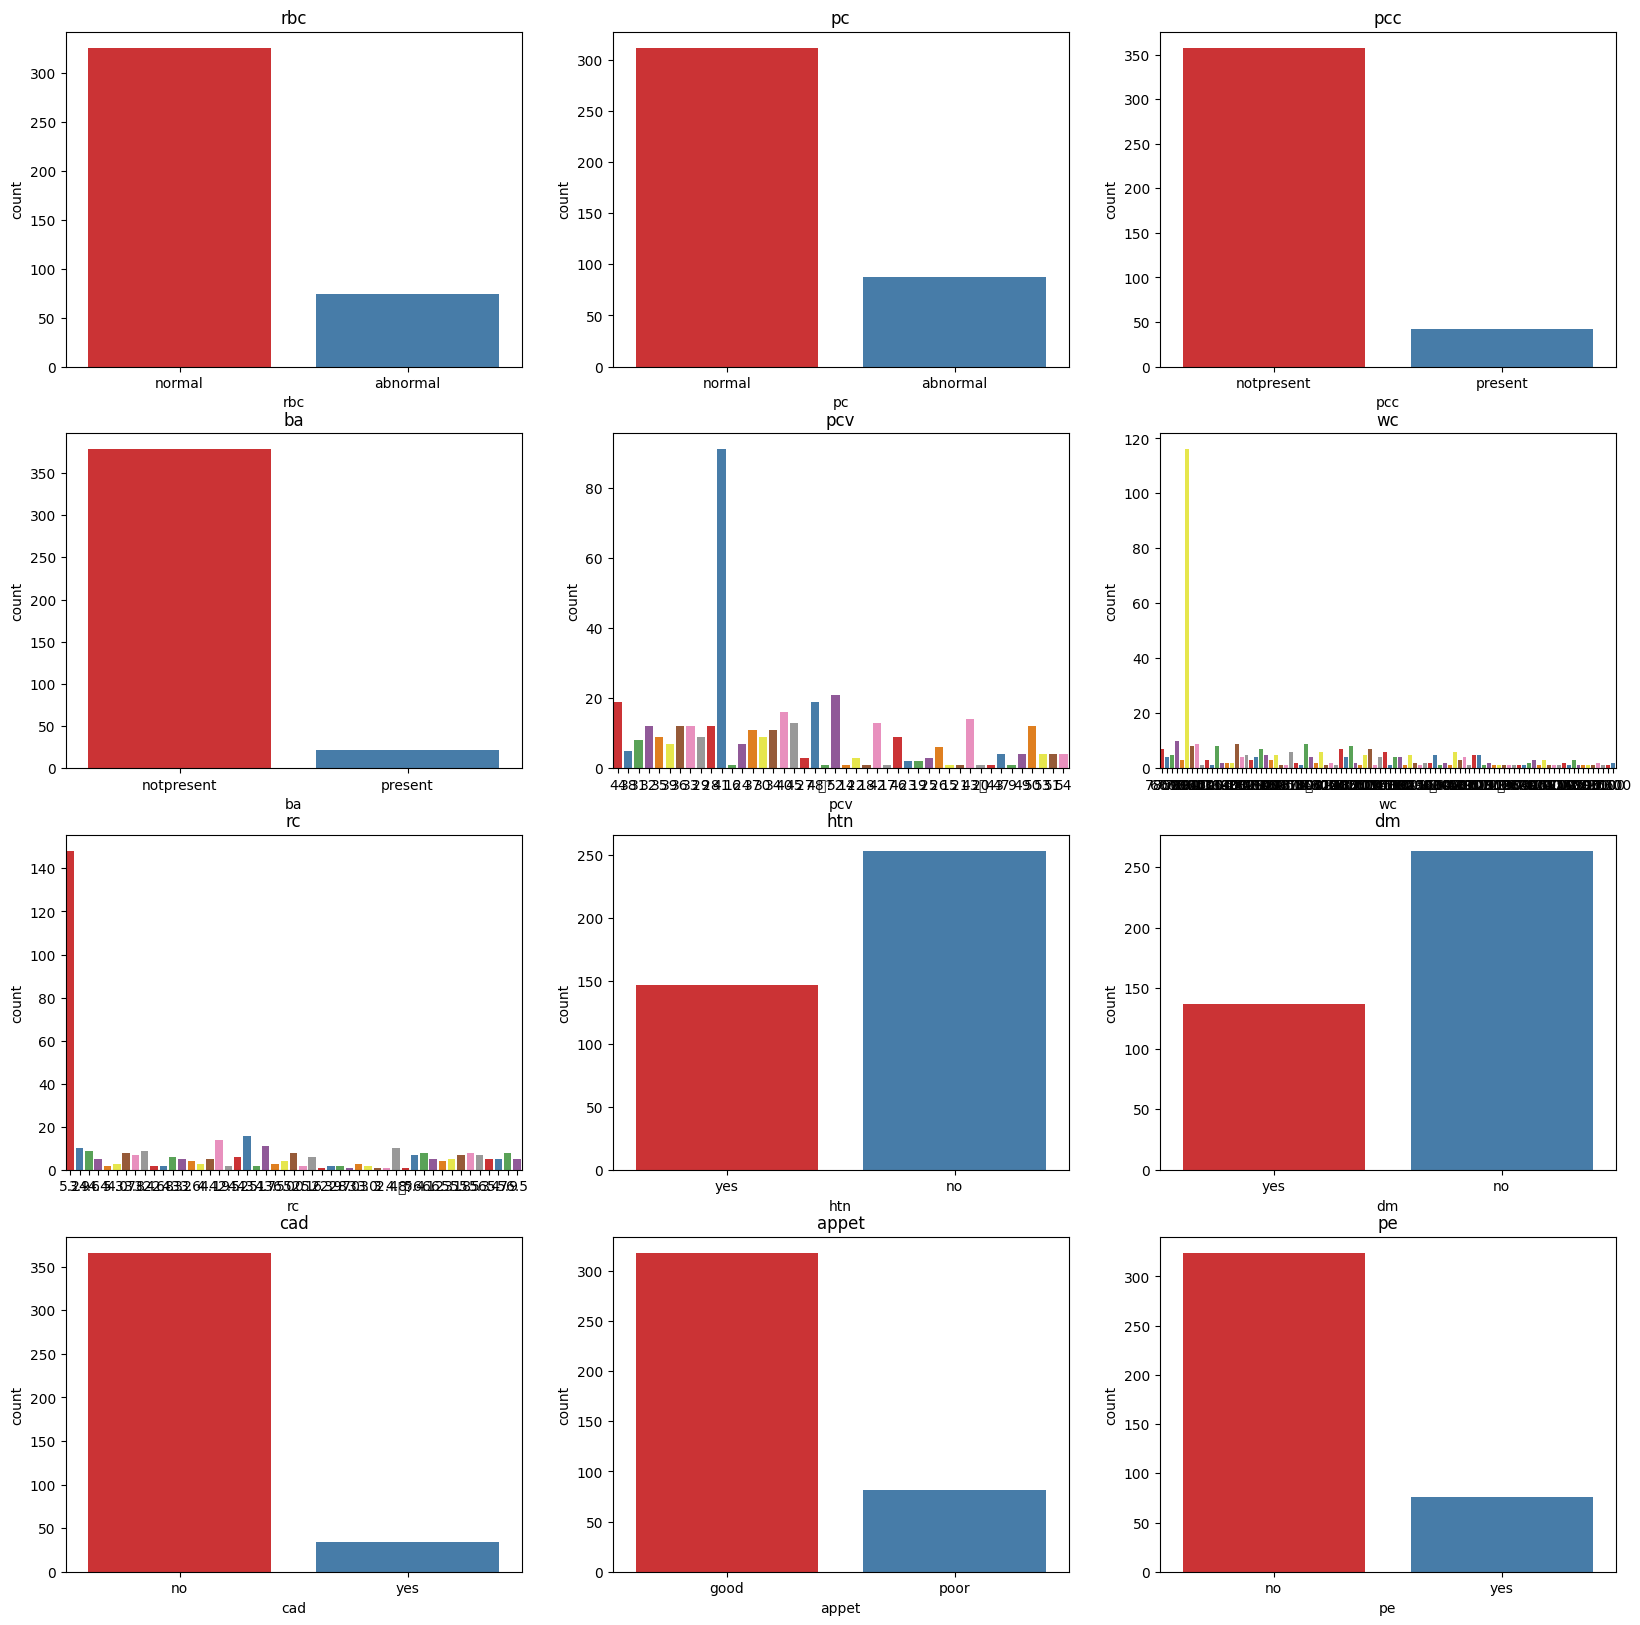

In [40]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
  plt.subplot(4,3,i+1)
  sns.countplot(x=data[feature], palette='Set1')
  plt.title(feature)

<Axes: >

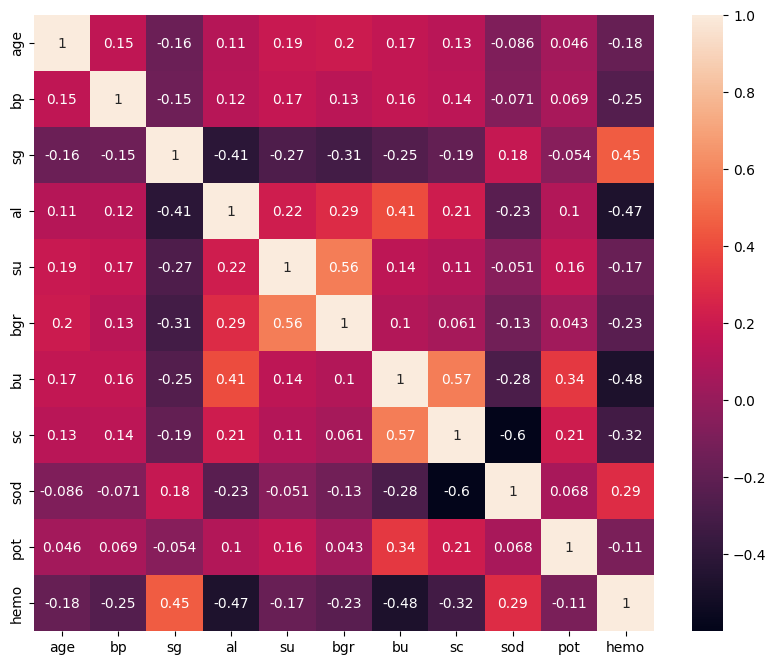

In [42]:
plt.figure(figsize=(10,8))
corr_df = data.corr(numeric_only=True)
sns.heatmap(corr_df,annot=True)

In [81]:
import plotly.express as px
px.violin(data, y='hemo', x="classification",color='classification')

In [66]:
px.scatter(data,'hemo','pcv',color='classification')

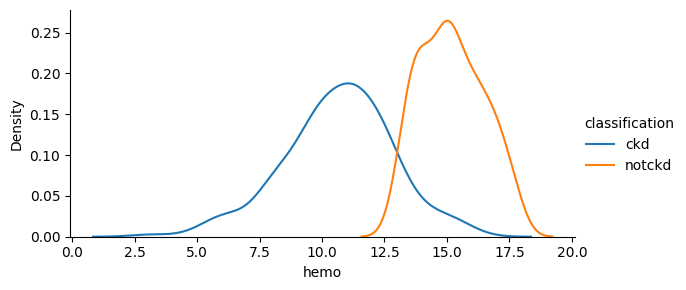

In [80]:
grid=sns.FacetGrid(df, hue="classification",aspect=2)
grid.map(sns.kdeplot,'hemo')
grid.add_legend()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [79]:
df.corr(numeric_only=True)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746


In [82]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in cat_col:
    data[col]=le.fit_transform(data[col])

data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,32,72,34,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,106.0,...,26,56,34,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,1,0,0,423.0,...,19,70,34,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,0,1,0,117.0,...,20,62,19,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,0,1,0,0,106.0,...,23,68,27,0,0,0,0,0,0,0


In [83]:
from sklearn.feature_selection import SelectKBest #Also known as Information Gain
from sklearn.feature_selection import chi2

ind_col=[col for col in data.columns if col!='classification']
dep_col='classification'

x=data[ind_col]
y=data[dep_col]

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(x,y)

datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])

dfcolumns=pd.DataFrame(x.columns)

features_rank=pd.concat([dfcolumns,datascores],axis=1)

features_rank.columns=['Features','Score']

# features_rank.nlargest(10,'Score')  --->  fetch largest 10 values of Score column

selected_columns=features_rank.nlargest(10,'Score')['Features'].values
X_new=data[selected_columns]
X_new

,bgr,bu,pcv,sc,rc,al,hemo,age,su,htn
0,121.0,36.0,32,1.2,34,1.0,15.4,48.0,0.0,1
1,106.0,18.0,26,0.8,34,4.0,11.3,7.0,0.0,0
2,423.0,53.0,19,1.8,34,2.0,9.6,62.0,3.0,0
3,117.0,56.0,20,3.8,19,4.0,11.2,48.0,0.0,1
4,106.0,26.0,23,1.4,27,2.0,11.6,51.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
395,140.0,49.0,35,0.5,30,0.0,15.7,55.0,0.0,0
396,75.0,31.0,42,1.2,44,0.0,16.5,42.0,0.0,0
397,100.0,26.0,37,0.6,36,0.0,15.8,12.0,0.0,0
398,114.0,50.0,39,1.0,41,0.0,14.2,17.0,0.0,0


In [84]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7, random_state=123)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

names = [
    "CatBoostClassifier",
    "Support Vector Machine",
    "Decision Tree",
    "Neural Network",
    "Random Forest",
    "XGBoost",
    "LGBMClassifier",
    "XGBRFClassifier",
    "GradientBoosting",
    "GaussianNB",
    "KNeighborsClassifier"
]
models = [
    CatBoostClassifier(verbose= False),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    lightgbm.LGBMClassifier(max_depth=2, random_state=4),
    xgboost.XGBRFClassifier(max_depth=3, random_state=1),
    GradientBoostingClassifier(max_depth=2, random_state=1),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
]

accuracy=[]

Confusion matrix of  CatBoostClassifier
[[75  3]
 [ 1 41]]
Accuracy score is  0.9666666666666667
Confusion matrix of  Support Vector Machine
[[54 24]
 [ 1 41]]
Accuracy score is  0.7916666666666666
Confusion matrix of  Decision Tree
[[75  3]
 [ 2 40]]
Accuracy score is  0.9583333333333334
Confusion matrix of  Neural Network
[[71  7]
 [ 2 40]]
Accuracy score is  0.925
Confusion matrix of  Random Forest
[[75  3]
 [ 1 41]]
Accuracy score is  0.9666666666666667
Confusion matrix of  XGBoost
[[74  4]
 [ 1 41]]
Accuracy score is  0.9583333333333334
[LightGBM] [Info] Number of positive: 108, number of negative: 172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 10
[LightGBM] [Info] [binary:BoostFrom

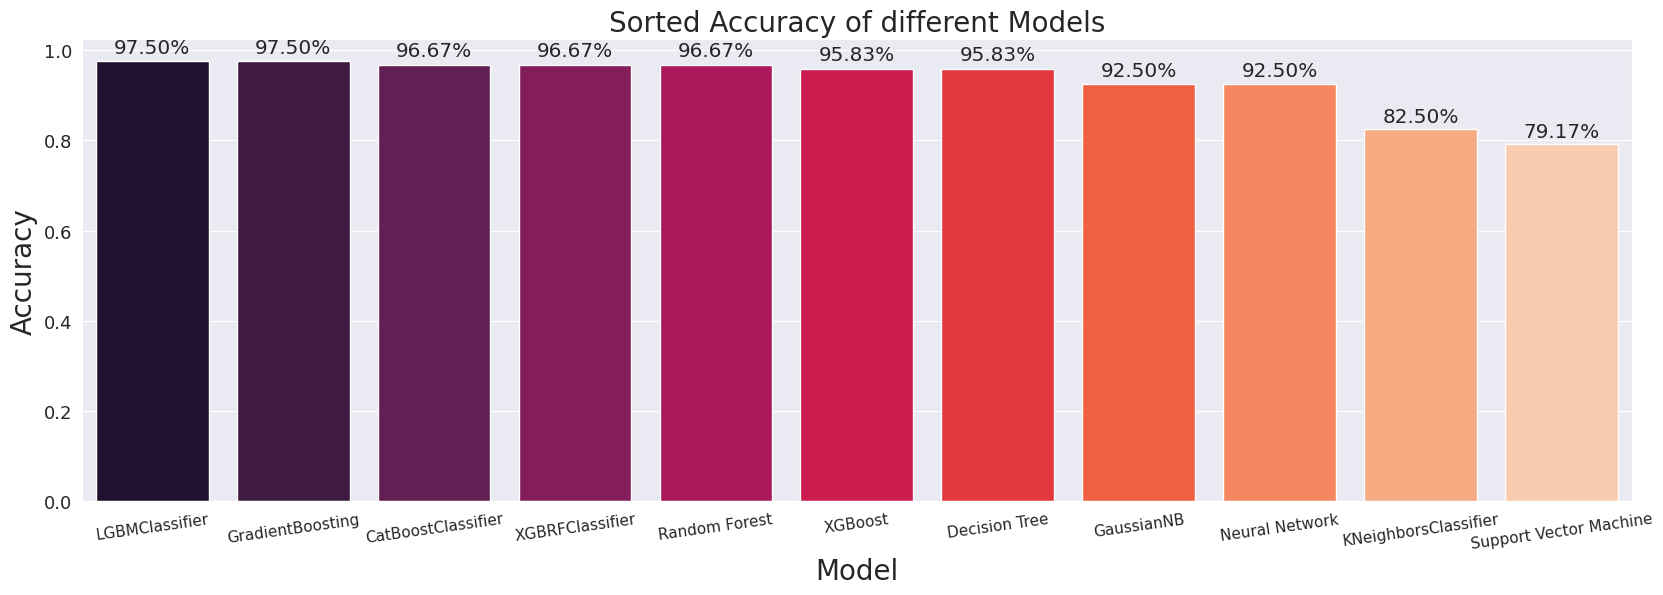

In [86]:
for model, name in zip(models,names):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('='*50)

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Sorted Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()